**Additional information**  
[Cars93 metadata](https://jse.amstat.org/v1n1/datasets.lock.html) 

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Load data
cars93_dataset = pd.read_csv("Cars93.csv", index_col=0, keep_default_na=False)

### 1. Boxplot

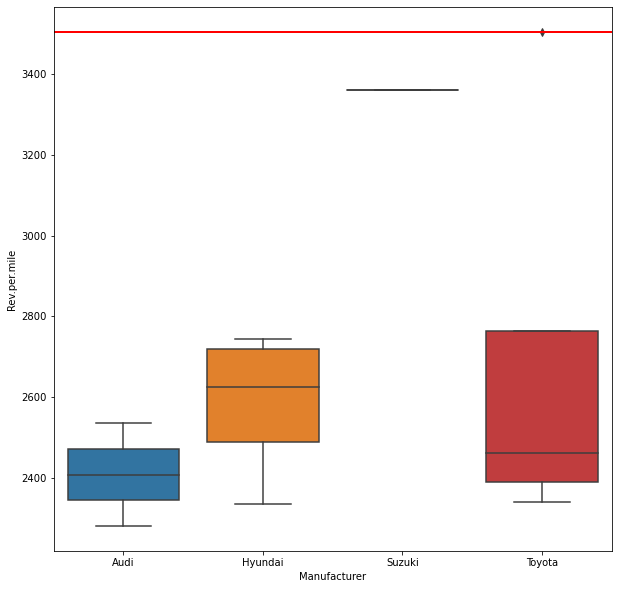

In [3]:
# Boxplot for revs per mile

# Filtering the dataset to keep only the manufacturers in question
manufacturers_dataset = cars93_dataset[
    cars93_dataset["Manufacturer"].isin(["Audi", "Toyota", "Suzuki", "Hyundai"])
]

# Resizing the plot for better understanding
plt.figure(figsize=(10, 10))
# Boxplot for revs per mile per chosen manufacturers
sns.boxplot(x="Manufacturer", y="Rev.per.mile", data=manufacturers_dataset)
# Drawing a line to determine the maximum Rev per mile
plt.axhline(
    y=manufacturers_dataset["Rev.per.mile"].max(), color="r", linestyle="-", linewidth=2
)
plt.show()

In [4]:
# Determining the value of the maximum Rev per mile
manufacturers_dataset.groupby(by=["Manufacturer"]).max()["Rev.per.mile"]

Manufacturer
Audi       2535
Hyundai    2745
Suzuki     3360
Toyota     3505
Name: Rev.per.mile, dtype: int64

### 2. Histogram

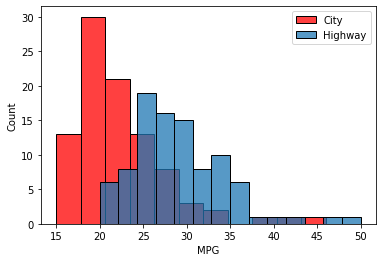

In [28]:
# Histogram of MPG
fig, ax = plt.subplots()
# Creating a histogram for the MPG in the city
sns.histplot(data=cars93_dataset, x="MPG.city", color="r")
# Creating a histogram for the MPG on the Highway
sns.histplot(data=cars93_dataset, x="MPG.highway")
# Setting label for x-axis
plt.xlabel("MPG")
# Setting legend to identify different histograms
ax.legend(["City", "Highway"])
plt.show()

It is generally more fuel efficiennt to drive on the highway as the MPGs are higher, meaning the cars consume less fuel and can drive longer distances

### 3. Lineplot

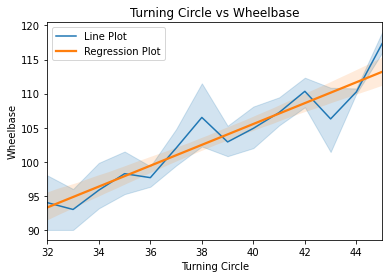

In [14]:
# Lineplot (Wheelbase vs turning circle)
plt.figure()
# Creating a line plot for Turn Circle vs Wheekbase
sns.lineplot(data=cars93_dataset, x="Turn.circle", y="Wheelbase")
# Regression line that providing a broader understanding 
# Of the relationship between the variables "Wheelbase" and "Turning Circle." 
sns.regplot(data=cars93_dataset, x="Turn.circle", y="Wheelbase", scatter=False)
plt.legend(['Line Plot', 'Regression Plot'])
# Setting label for x-axis
plt.xlabel("Turning Circle")
# Setting label for y-axis
plt.ylabel("Wheelbase")
# Setting title for the plot
plt.title("Turning Circle vs Wheelbase")
plt.show()

There is a positive correlation between wheelbase and turning circle, in other words as the wheelbase gets larger, the turning circle increases as well.
Although there's not a consistent behavior shown in line plot, but the regression plot explains that on average with the increase in the wheelbase, the turning circle surges as well.

### 4. Barplot

<Figure size 432x288 with 0 Axes>

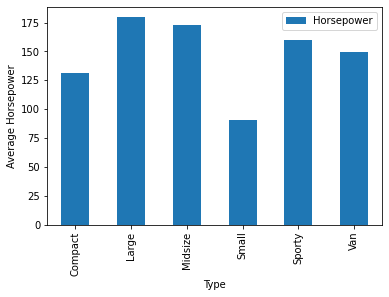

In [6]:
# Barplot for mean horsepower

# Grouping the rows by different types
group_by_type = cars93_dataset.groupby(by=["Type"])

# Calculating the average of the other columns per each type
avg_by_type = group_by_type.mean(numeric_only=True)

# Extracting the data required for plotting
features_to_plot = pd.DataFrame({"Horsepower": avg_by_type["Horsepower"]})

plt.figure()
# Barplot for mean horsepower per each car type
features_to_plot.plot(kind="bar", ylabel="Average Horsepower")
plt.show()

The larger car means more horsepower on average.